# FLOW
Here's the updated project flow incorporating your plan to analyze indicators one at a time and in combinations:

1. **Data Acquisition:**
   - Fetch Nifty 50 data from Yahoo Finance for the period 2014-2024.
   - Clean and preprocess the data.
   - **Output:** Cleaned dataset.

2. **Feature Engineering (Indicators):**
   - **Leading Indicators:**
     - Start with the first leading indicator (e.g., RSI).
     - Apply it to the dataset.
     - Train LSTM, GRU, and RNN models using the dataset with this indicator.
     - **Output:** Trained models and performance metrics.

   - **Lagging Indicators:**
     - Start with the first lagging indicator (e.g., SMA).
     - Apply it to the dataset.
     - Train LSTM, GRU, and RNN models using the dataset with this indicator.
     - **Output:** Trained models and performance metrics.

3. **Combining Indicators:**
   - **Single Leading and Lagging Indicator:**
     - Combine the first leading indicator (e.g., RSI) and the first lagging indicator (e.g., SMA).
     - Train models using this combined dataset.
     - **Output:** Trained models and performance metrics.

   - **First Leading and Second Leading Indicator:**
     - Add the second leading indicator (e.g., MACD) to the first leading indicator dataset.
     - Train models using this new dataset.
     - **Output:** Trained models and performance metrics.

   - **First Lagging and Second Lagging Indicator:**
     - Add the second lagging indicator (e.g., EMA) to the first lagging indicator dataset.
     - Train models using this new dataset.
     - **Output:** Trained models and performance metrics.

   - **Combining Leading and Lagging Indicators:**
     - Combine the first leading indicator and the second lagging indicator.
     - Train models using this combined dataset.
     - **Output:** Trained models and performance metrics.

4. **Evaluation and Prediction:**
   - Evaluate all trained models on the testing dataset.
   - Compare the performance of each combination.
   - Use the best-performing models to make predictions on unseen data.
   - **Output:** Performance metrics and predicted values.

5. **Backtesting:**
   - Simulate trading strategies based on the best predictions.
   - Analyze the performance of these strategies.
   - **Output:** Backtest results.

6. **Model Saving:**
   - Save the final models and exported results.
   - **Output:** Saved model files and results.

7. **Final Output:**
   - Visualize the comparison between predicted and actual values.
   - Save the complete notebook and results.

This structure allows for a systematic approach to testing each indicator and their combinations while evaluating their impact on model performance. Let me know if you need any more adjustments!

In [ ]:
!pip install yfinance



In [ ]:
import pandas as pd
import yfinance as yf

# Define the ticker symbol for Nifty 50
ticker = "^NSEI"  # Nifty 50 Index

# Set the date range (e.g., last 5 years)
start_date = "2014-01-01"
end_date = "2024-01-01"

# Fetch the data
nifty_data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the dataset
print(nifty_data.head())


[*********************100%***********************]  1 of 1 completed

Price                        Adj Close        Close         High          Low  \
Ticker                           ^NSEI        ^NSEI        ^NSEI        ^NSEI   
Date                                                                            
2014-01-02 00:00:00+00:00  6221.149902  6221.149902  6358.299805  6211.299805   
2014-01-03 00:00:00+00:00  6211.149902  6211.149902  6221.700195  6171.250000   
2014-01-06 00:00:00+00:00  6191.450195  6191.450195  6224.700195  6170.250000   
2014-01-07 00:00:00+00:00  6162.250000  6162.250000  6221.500000  6144.750000   
2014-01-08 00:00:00+00:00  6174.600098  6174.600098  6192.100098  6160.350098   

Price                             Open  Volume  
Ticker                           ^NSEI   ^NSEI  
Date                                            
2014-01-02 00:00:00+00:00  6301.250000  158100  
2014-01-03 00:00:00+00:00  6194.549805  139000  
2014-01-06 00:00:00+00:00  6220.850098  118300  
2014-01-07 00:00:00+00:00  6203.899902  138600  
2014-01-

In [ ]:
# Save the data to a CSV file
nifty_data.to_csv('NSE50.csv', index=True)


In [ ]:
import pandas as pd


In [ ]:
# Load the dataset
data = pd.read_csv('/content/NSE50.csv', index_col='Date') # Remove parse_dates=['Date']
data.index = pd.to_datetime(data.index) # Convert index to datetime
# Display the first few rows of the dataset
print(data.head())

ValueError: Index Date invalid

In [ ]:
# Check for missing values
print(data.isnull().sum())


Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [ ]:
# Select relevant columns (if needed)
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]


In [ ]:
# Sort the data by date (if not already sorted)
data.sort_index(inplace=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Scale the data (example for closing prices)
scaled_data = scaler.fit_transform(data[['Close']])


In [ ]:
# Save the preprocessed data
data.to_csv('/content/NSE50_processed.csv')

**STEP 2**

## MACD (Moving Average Convergence Divergence)

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/NSE50_processed.csv')

# Calculate MACD
def calculate_macd(df, short_window=12, long_window=26, signal_window=9):
    # Calculate the short-term exponential moving average (EMA)
    df['EMA12'] = df['Close'].ewm(span=short_window, adjust=False).mean()
    # Calculate the long-term EMA
    df['EMA26'] = df['Close'].ewm(span=long_window, adjust=False).mean()
    # Calculate MACD
    df['MACD'] = df['EMA12'] - df['EMA26']
    # Calculate Signal Line
    df['Signal_Line'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()

    return df

# Apply the MACD calculation
data_with_macd = calculate_macd(data)

# Display the first few rows of the modified dataset
print(data_with_macd[['Close', 'MACD', 'Signal_Line']].head())


         Close      MACD  Signal_Line
0  6221.149902  0.000000     0.000000
1  6211.149902 -0.797721    -0.159544
2  6191.450195 -2.985111    -0.724658
3  6162.250000 -6.994221    -1.978570
4  6174.600098 -9.070362    -3.396929


In [ ]:
# Save the modified dataset to a new CSV file
output_file_path = '/content/NSE50_with_MACD.csv'
data_with_macd.to_csv(output_file_path, index=False)

print(f"Data saved to {output_file_path}")


Data saved to /content/NSE50_with_MACD.csv


## data prepareation

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the MACD dataset
data = pd.read_csv('/content/NSE50_with_MACD.csv')

# Select relevant features (OHLC and MACD)
features = data[['Open', 'High', 'Low', 'Close', 'MACD', 'Signal_Line']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)

# Function to create sequences for LSTM/GRU input
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), :]  # Previous time steps
        X.append(a)
        y.append(data[i + time_step, 3])  # Target is the 'Close' price
    return np.array(X), np.array(y)

# Create sequences (e.g., using 60 time steps)
time_step = 60
X, y = create_sequences(scaled_data, time_step)

# Split into training and testing sets (e.g., 80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f'Training data shape: {X_train.shape}, {y_train.shape}')
print(f'Testing data shape: {X_test.shape}, {y_test.shape}')


Training data shape: (1913, 60, 6), (1913,)
Testing data shape: (479, 60, 6), (479,)


## **Model Building**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout

# Function to build and train the model
def build_and_train_model(model_type, X_train, y_train, X_test, y_test):
    model = Sequential()

    if model_type == 'LSTM':
        model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(LSTM(50, return_sequences=False))

    elif model_type == 'GRU':
        model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(GRU(50, return_sequences=False))

    elif model_type == 'RNN':
        model.add(tf.keras.layers.SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(tf.keras.layers.SimpleRNN(50, return_sequences=False))

    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    return model

# Build and train models
lstm_model = build_and_train_model('LSTM', X_train, y_train, X_test, y_test)
gru_model = build_and_train_model('GRU', X_train, y_train, X_test, y_test)
rnn_model = build_and_train_model('RNN', X_train, y_train, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0105 - val_loss: 8.3554e-04
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.1758e-04 - val_loss: 0.0011
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.5498e-04 - val_loss: 0.0016
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.7843e-04 - val_loss: 7.1098e-04
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.3408e-04 - val_loss: 0.0011
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7075e-04 - val_loss: 9.5177e-04
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.6249e-04 - val_loss: 5.7429e-04
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.8586e-04 - val_loss: 7.8914e-04
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.2600e-04 - val_loss: 5.1835e-04
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.5385e-04 - val_loss: 5.9002e-04
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.6714e-04 - val_loss: 5.6339

## **Evaluation and Prediction Steps**

In [ ]:
# Function to make predictions and evaluate model performance
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Inverse transform to get actual values
    y_pred_inv = scaler.inverse_transform(np.concatenate((np.zeros((y_pred.shape[0], 5)), y_pred), axis=1))[:, -1]
    y_test_inv = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], 5)), y_test.reshape(-1, 1)), axis=1))[:, -1]

    # Calculate performance metrics
    mse = np.mean((y_test_inv - y_pred_inv) ** 2)
    mae = np.mean(np.abs(y_test_inv - y_pred_inv))

    return y_pred_inv, y_test_inv, mse, mae

# Evaluate each model
lstm_preds, lstm_actuals, lstm_mse, lstm_mae = evaluate_model(lstm_model, X_test, y_test)
gru_preds, gru_actuals, gru_mse, gru_mae = evaluate_model(gru_model, X_test, y_test)
rnn_preds, rnn_actuals, rnn_mse, rnn_mae = evaluate_model(rnn_model, X_test, y_test)

# Print performance metrics
print("LSTM - MSE:", lstm_mse, "MAE:", lstm_mae)
print("GRU - MSE:", gru_mse, "MAE:", gru_mae)
print("RNN - MSE:", rnn_mse, "MAE:", rnn_mae)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
LSTM - MSE: 920.6475950544653 MAE: 24.509143158454638
GRU - MSE: 2367.4551505404006 MAE: 43.65844915543832
RNN - MSE: 1467.7172675407917 MAE: 30.45649810099187


#### macd results
LSTM - MSE: 920.6475950544653 MAE: 24.509143158454638
GRU - MSE: 2367.4551505404006 MAE: 43.65844915543832
RNN - MSE: 1467.7172675407917 MAE: 30.45649810099187

### hypertuning the macd

In [ ]:
# Modify the model compilation to include metrics
def create_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Add MAE as a metric
    return model

# Loop over hyperparameters
for units in units_list:
    for dropout in dropout_rates:
        print(f'Training model with {units} units and {dropout} dropout rate...')
        model = create_model(units, dropout)

        # Use early stopping to prevent overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        # Train the model
        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                  callbacks=[early_stopping], verbose=1)

        # Evaluate the model
        loss, mae = model.evaluate(X_test, y_test, verbose=0)  # Only loss and MAE are returned
        mse = loss  # Since we're only using MSE as the loss
        results.append((units, dropout, mse, mae))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['Units', 'Dropout Rate', 'MSE', 'MAE'])
print(results_df)


Training model with 50 units and 0.2 dropout rate...
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0265 - mae: 0.1109 - val_loss: 0.0015 - val_mae: 0.0313
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0021 - mae: 0.0333 - val_loss: 0.0015 - val_mae: 0.0334
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0016 - mae: 0.0288 - val_loss: 6.2983e-04 - val_mae: 0.0199
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - mae: 0.0277 - val_loss: 0.0011 - val_mae: 0.0292
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 4.9480e-04 - val_mae: 0.0168
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012 - mae: 0.0249 - val_loss: 0.0010 - val_mae: 0.0255
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - mae: 0.0240 - val_loss: 5.0549e-04 - val_mae: 0.0170
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - mae: 0.0246 - val_loss: 5.0512e-04 - val_mae: 0.0168


### results of the macd

In [ ]:
import matplotlib.pyplot as plt

# Use the best model (150 units, 0.2 dropout) for predictions
best_model = create_model(units=150, dropout_rate=0.2)

# Fit the model again on the training data (you may choose to load the best weights instead)
best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
               callbacks=[early_stopping], verbose=1)

# Make predictions on the test set
best_model_predictions = best_model.predict(X_test)

# Inverse transform the predictions and actual values
best_model_predictions_inv = scaler.inverse_transform(np.concatenate((np.zeros((best_model_predictions.shape[0], 5)), best_model_predictions), axis=1))[:, -1]
y_test_inv = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], 5)), y_test.reshape(-1, 1)), axis=1))[:, -1]

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Prices', color='blue')
plt.plot(best_model_predictions_inv, label='Predicted Prices', color='orange')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


NameError: name 'create_model' is not defined

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0158 - mae: 0.0763 - val_loss: 0.0013 - val_mae: 0.0311
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.1014e-04 - mae: 0.0224 - val_loss: 5.4047e-04 - val_mae: 0.0174
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.3315e-04 - mae: 0.0202 - val_loss: 9.1428e-04 - val_mae: 0.0240
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.9575e-04 - mae: 0.0197 - val_loss: 4.8525e-04 - val_mae: 0.0165
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.8557e-04 - mae: 0.0200 - val_loss: 5.0543e-04 - val_mae: 0.0186
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.5060e-04 - mae: 0.0187 - val_loss: 6.3446e-04 - val_mae: 0.0192
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.6606e-04 - mae: 0.0191 - val_loss: 9.6984e-04 - val_mae: 0.0255
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.1859e-04 - mae: 0.0182 - val_loss: 0.0018 - val_mae: 0.0381
Epoch 9/50
60/60

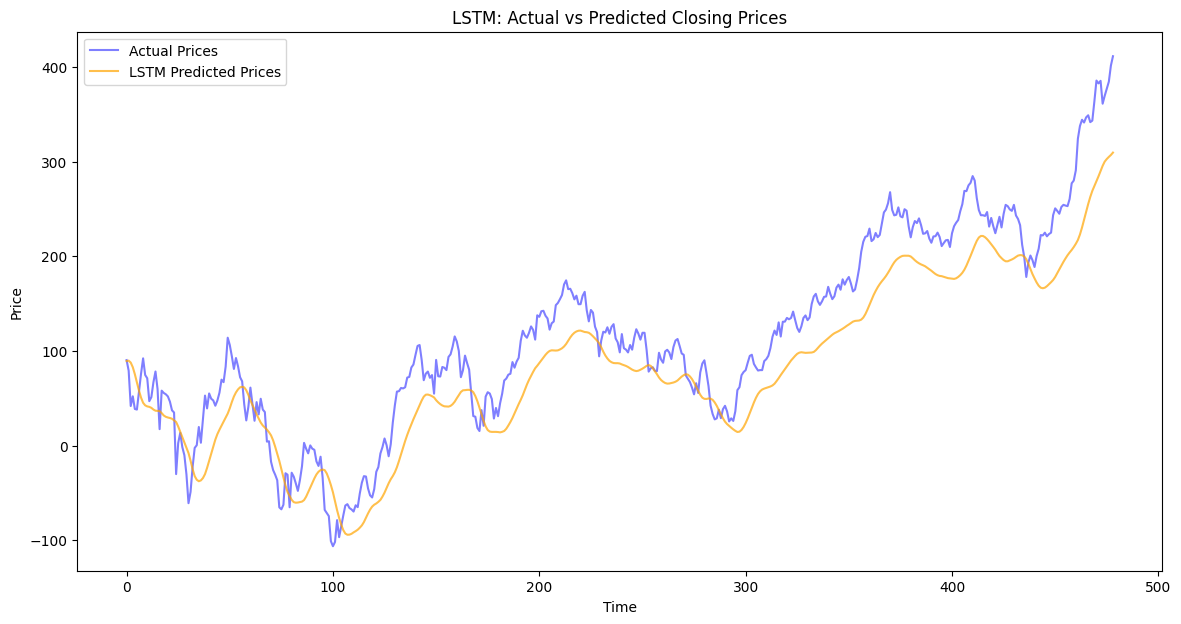

In [ ]:
# Create and train the LSTM model
lstm_model = create_model(units=150, dropout_rate=0.2)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
               callbacks=[early_stopping], verbose=1)

# Make predictions with LSTM
lstm_predictions = lstm_model.predict(X_test)

# Inverse transform the predictions and actual values
lstm_predictions_inv = scaler.inverse_transform(np.concatenate((np.zeros((lstm_predictions.shape[0], 5)), lstm_predictions), axis=1))[:, -1]
y_test_inv = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], 5)), y_test.reshape(-1, 1)), axis=1))[:, -1]

# Plot the LSTM results
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Prices', color='blue', alpha=0.5)
plt.plot(lstm_predictions_inv, label='LSTM Predicted Prices', color='orange', alpha=0.7)
plt.title('LSTM: Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0211 - mae: 0.0938 - val_loss: 2.8640e-04 - val_mae: 0.0127
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.3927e-04 - mae: 0.0231 - val_loss: 2.5770e-04 - val_mae: 0.0129
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.6136e-04 - mae: 0.0217 - val_loss: 3.0548e-04 - val_mae: 0.0133
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.6635e-04 - mae: 0.0197 - val_loss: 0.0018 - val_mae: 0.0396
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.7021e-04 - mae: 0.0194 - val_loss: 2.2244e-04 - val_mae: 0.0119
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.4187e-04 - mae: 0.0194 - val_loss: 4.4740e-04 - val_mae: 0.0184
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.8732e-04 - mae: 0.0165 - val_loss: 2.4458e-04 - val_mae: 0.0128
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.2881e-04 - mae: 0.0172 - val_loss: 2.7868e-04 - val_mae: 0.0139
Epoch 9/50
6

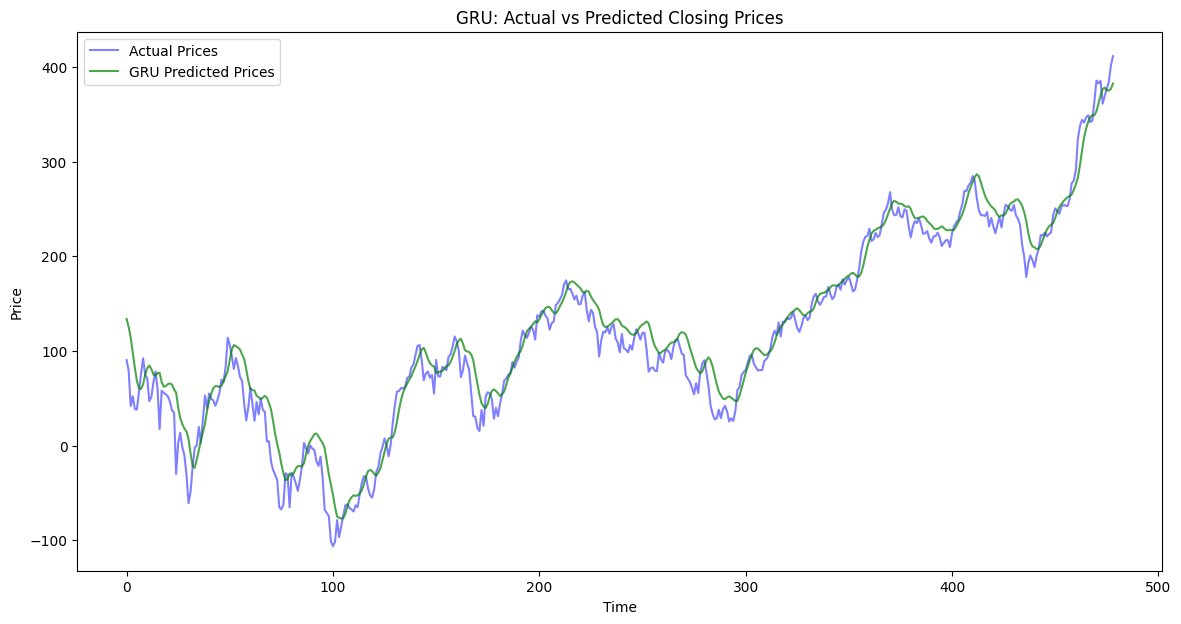

In [ ]:
# Create and train the GRU model
gru_model = Sequential()
gru_model.add(GRU(150, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(150, return_sequences=False))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
              callbacks=[early_stopping], verbose=1)

# Make predictions with GRU
gru_predictions = gru_model.predict(X_test)

# Inverse transform the predictions
gru_predictions_inv = scaler.inverse_transform(np.concatenate((np.zeros((gru_predictions.shape[0], 5)), gru_predictions), axis=1))[:, -1]

# Plot the GRU results
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Prices', color='blue', alpha=0.5)
plt.plot(gru_predictions_inv, label='GRU Predicted Prices', color='green', alpha=0.7)
plt.title('GRU: Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Save the LSTM model
lstm_model.save('lstm_model_macd.h5')

# Save the GRU model
gru_model.save('gru_model_macd.h5')

print("Models saved successfully!")


Models saved successfully!


## **MA**

In [ ]:
import pandas as pd

# Load the processed data
data_path = '/content/NSE50_processed.csv'
data = pd.read_csv(data_path)

# Calculate Moving Averages
# For example, calculate 20-day and 50-day SMAs
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Calculate Exponential Moving Average (EMA)
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()

# Drop rows with NaN values caused by rolling calculations
data.dropna(inplace=True)

# Save the updated dataset
data.to_csv('/content/NSE50_with_moving_averages.csv', index=False)

# Prepare data for training (similar to previous steps)
# Feature selection: Include moving averages
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50']
X = data[features].values
y = data['Close'].values

# Continue with the same preprocessing steps for LSTM, GRU, RNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Create sequences (similar to before)
def create_sequences(X, y, time_steps=60):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_seq, y_train_seq = create_sequences(X_train, y_train)
X_test_seq, y_test_seq = create_sequences(X_test, y_test)

# Train your models (LSTM, GRU, RNN) with the updated dataset
# You can reuse the previous model training code here


In [ ]:
# Check the updated dataframe
print(data.tail())

                           Date          Open          High           Low  \
2448  2023-12-22 00:00:00+00:00  21295.849609  21390.500000  21232.449219   
2449  2023-12-26 00:00:00+00:00  21365.199219  21477.150391  21329.449219   
2450  2023-12-27 00:00:00+00:00  21497.650391  21675.750000  21495.800781   
2451  2023-12-28 00:00:00+00:00  21715.000000  21801.449219  21678.000000   
2452  2023-12-29 00:00:00+00:00  21737.650391  21770.300781  21676.900391   

             Close  Volume        SMA_20        SMA_50        EMA_20  \
2448  21349.400391  284700  20831.387500  20020.751992  20860.984922   
2449  21441.349609  219500  20913.720020  20053.351992  20916.257749   
2450  21654.750000  256500  21001.972559  20090.566992  20986.590345   
2451  21778.699219  393100  21086.077539  20131.119961  21062.029285   
2452  21731.400391  270900  21165.990039  20171.112969  21125.778914   

            EMA_50  
2448  20298.886262  
2449  20343.688746  
2450  20395.102913  
2451  20449.361591  

### Model Building

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(150, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(150, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the LSTM model
lstm_model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, validation_data=(X_test_seq, y_test_seq),
               callbacks=[early_stopping], verbose=1)


Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 158731216.0000 - mae: 11975.0850 - val_loss: 154914880.0000 - val_mae: 11837.1426
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 160693776.0000 - mae: 12042.3828 - val_loss: 154699024.0000 - val_mae: 11828.0225
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 158065232.0000 - mae: 11951.5811 - val_loss: 154490480.0000 - val_mae: 11819.2031
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 160117952.0000 - mae: 12037.5811 - val_loss: 154285088.0000 - val_mae: 11810.5107
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 161783744.0000 - mae: 12082.2295 - val_loss: 154081024.0000 - val_mae: 11801.8691
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 156129536.0000 - mae: 11861.6855 - val_loss: 153879024.0000 - val_mae: 11793.3076
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 158383600.0000 - mae: 11940.7285 - val_loss: 153672912.0000 - val_mae: 11784.5645
Epoch 8/50
59/5

In [ ]:
from keras.layers import GRU

# GRU Model
gru_model = Sequential()
gru_model.add(GRU(150, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(150, return_sequences=False))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the GRU model
gru_model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, validation_data=(X_test_seq, y_test_seq),
              callbacks=[early_stopping], verbose=1)


Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 156622720.0000 - mae: 11901.2148 - val_loss: 154931680.0000 - val_mae: 11837.8525
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 159138256.0000 - mae: 11972.2178 - val_loss: 154708368.0000 - val_mae: 11828.4170
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 163439744.0000 - mae: 12154.8721 - val_loss: 154492528.0000 - val_mae: 11819.2900
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 160800192.0000 - mae: 12057.4023 - val_loss: 154277136.0000 - val_mae: 11810.1738
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 160647648.0000 - mae: 12040.9688 - val_loss: 154063296.0000 - val_mae: 11801.1172
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 161078320.0000 - mae: 12063.6396 - val_loss: 153850912.0000 - val_mae: 11792.1162
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 154284208.0000 - mae: 11794.3740 - val_loss: 153640112.0000 - val_mae: 11783.1738
Epoch 8/50
59/59

In [ ]:
# Evaluate LSTM Model
lstm_mse, lstm_mae = lstm_model.evaluate(X_test_seq, y_test_seq, verbose=0)
print(f'LSTM - MSE: {lstm_mse}, MAE: {lstm_mae}')

# Evaluate GRU Model
gru_mse, gru_mae = gru_model.evaluate(X_test_seq, y_test_seq, verbose=0)
print(f'GRU - MSE: {gru_mse}, MAE: {gru_mae}')



LSTM - MSE: 154914880.0, MAE: 11837.142578125
GRU - MSE: 154931680.0, MAE: 11837.8525390625


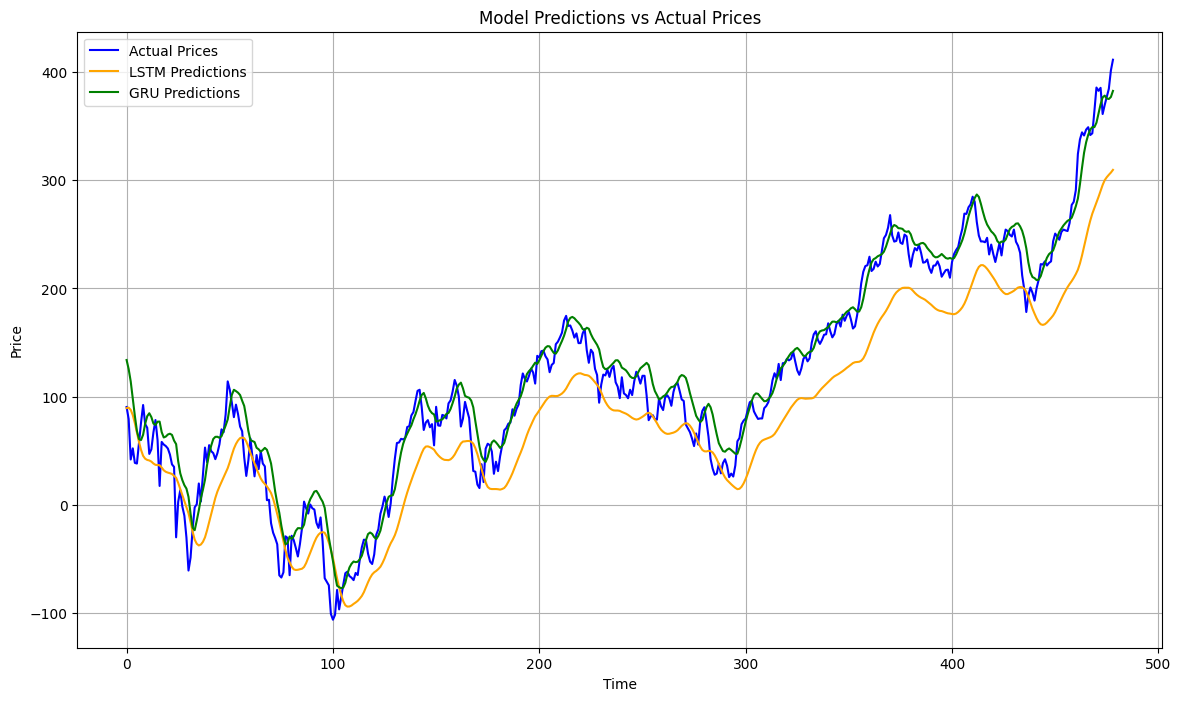

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(14, 8))

# Plot actual values
plt.plot(y_test_inv, label='Actual Prices', color='blue')

# Plot LSTM predictions
plt.plot(lstm_predictions_inv, label='LSTM Predictions', color='orange')

# Plot GRU predictions
plt.plot(gru_predictions_inv, label='GRU Predictions', color='green')

# Add title and labels
plt.title('Model Predictions vs Actual Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Show plot
plt.show()


In [ ]:
# Save the LSTM model
lstm_model.save('lstm_model_ma.h5')

# Save the GRU model
gru_model.save('gru_model_ma.h5')

print("Models saved successfully!")


Models saved successfully!


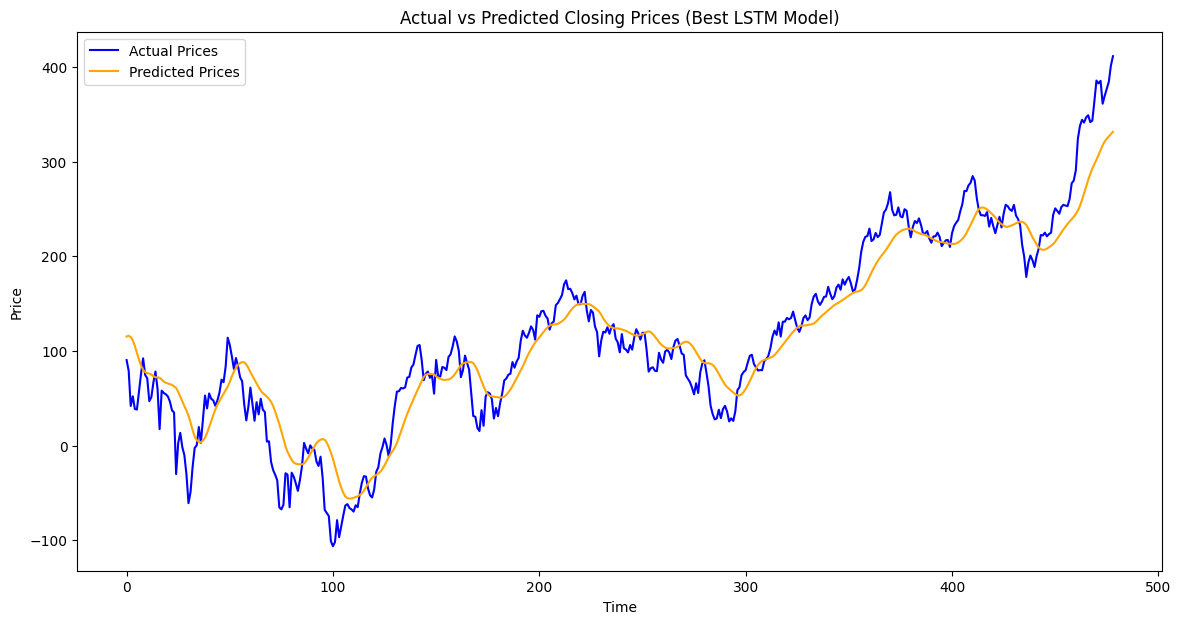

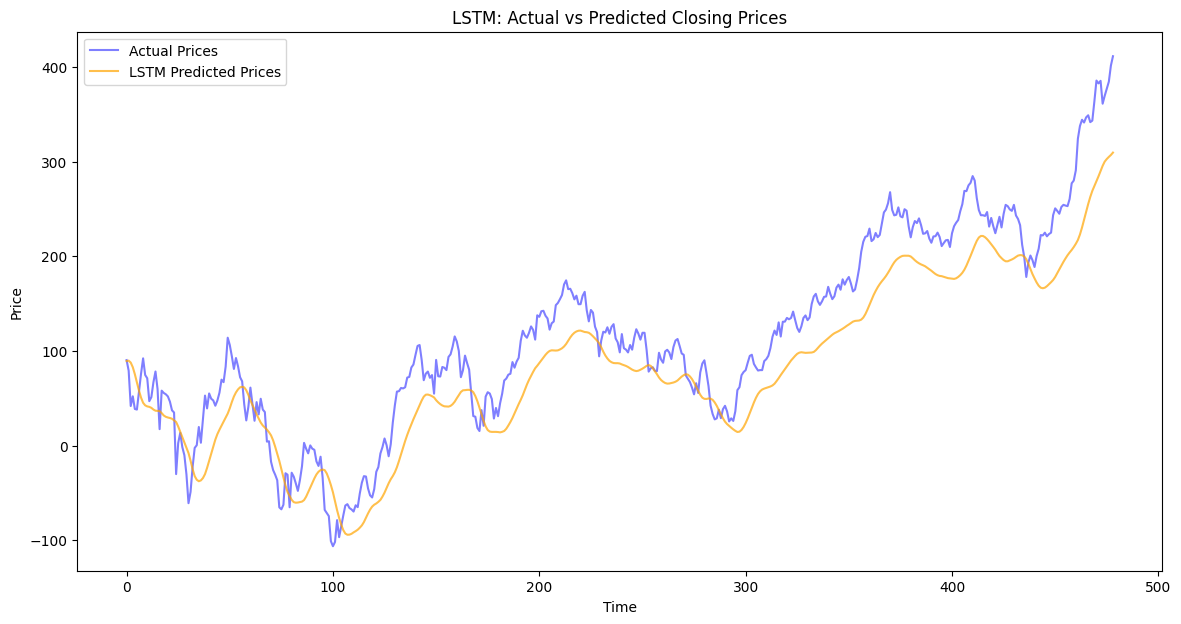

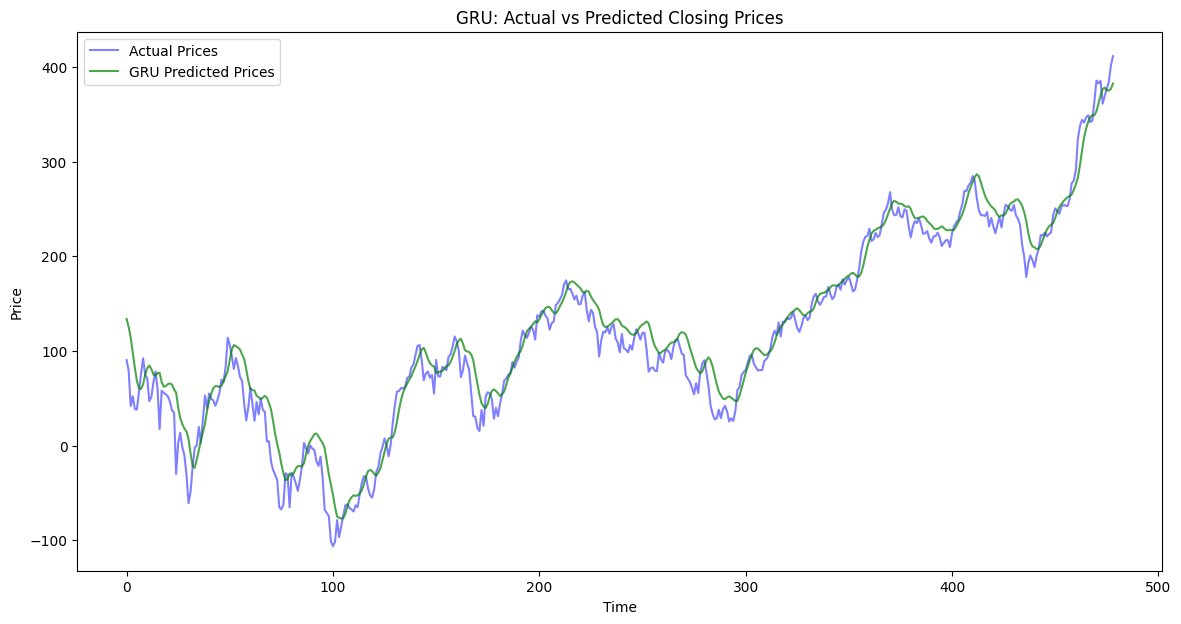

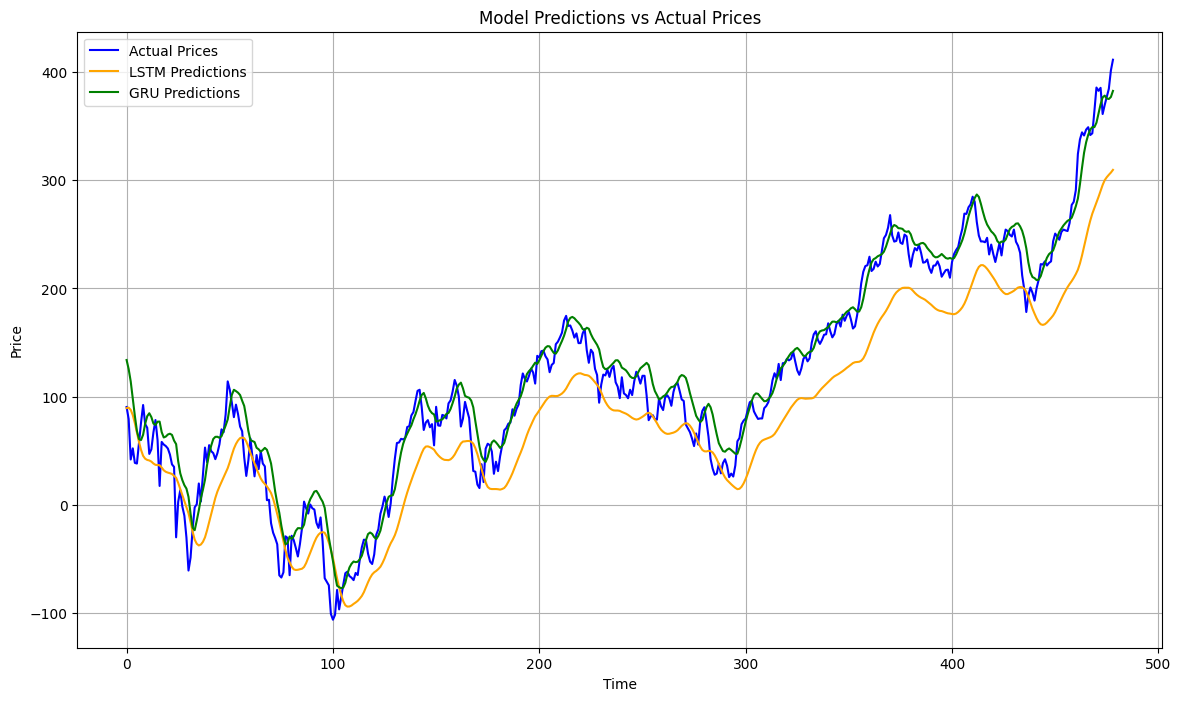

Plots saved as PNG images.


In [ ]:
# prompt: save all the iamges of the model

import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Save the plot of actual vs predicted prices for the best LSTM model
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Prices', color='blue')
plt.plot(best_model_predictions_inv, label='Predicted Prices', color='orange')
plt.title('Actual vs Predicted Closing Prices (Best LSTM Model)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.savefig('best_lstm_model_plot.png') # Save the plot as a PNG image
plt.show()

# Save the plot of actual vs predicted prices for the LSTM model
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Prices', color='blue', alpha=0.5)
plt.plot(lstm_predictions_inv, label='LSTM Predicted Prices', color='orange', alpha=0.7)
plt.title('LSTM: Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.savefig('lstm_model_plot.png') # Save the plot as a PNG image
plt.show()


# Save the plot of actual vs predicted prices for the GRU model
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Prices', color='blue', alpha=0.5)
plt.plot(gru_predictions_inv, label='GRU Predicted Prices', color='green', alpha=0.7)
plt.title('GRU: Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.savefig('gru_model_plot.png') # Save the plot as a PNG image
plt.show()

# Save the final combined plot
plt.figure(figsize=(14, 8))
plt.plot(y_test_inv, label='Actual Prices', color='blue')
plt.plot(lstm_predictions_inv, label='LSTM Predictions', color='orange')
plt.plot(gru_predictions_inv, label='GRU Predictions', color='green')
plt.title('Model Predictions vs Actual Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.savefig('combined_model_plot.png') # Save the plot as a PNG image
plt.show()

print("Plots saved as PNG images.")

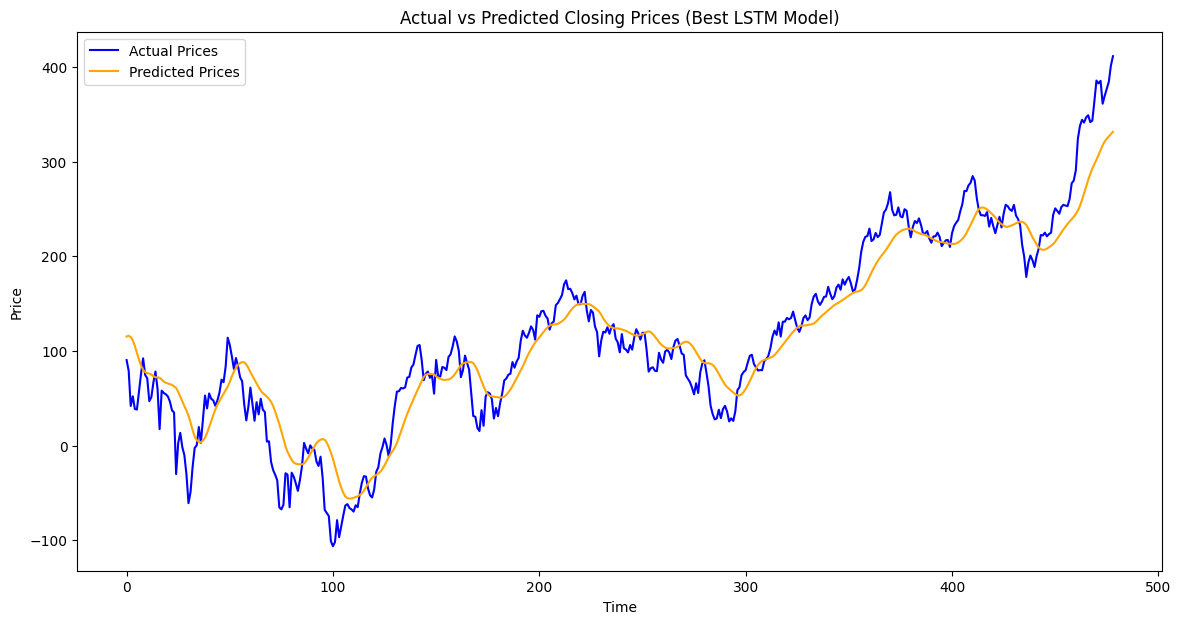

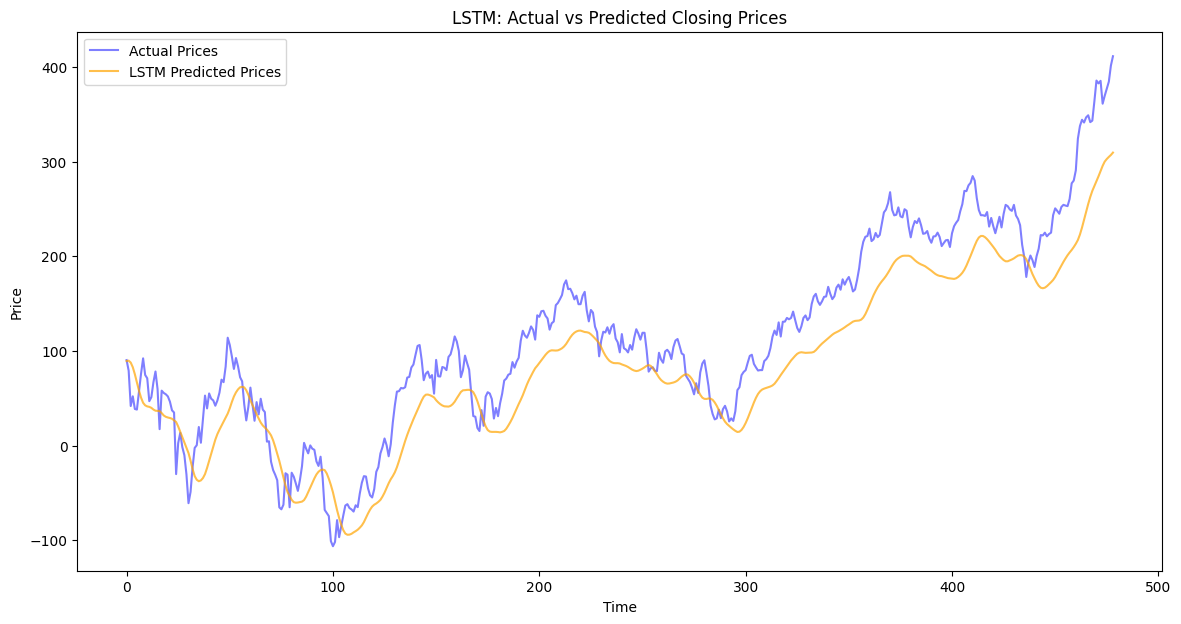

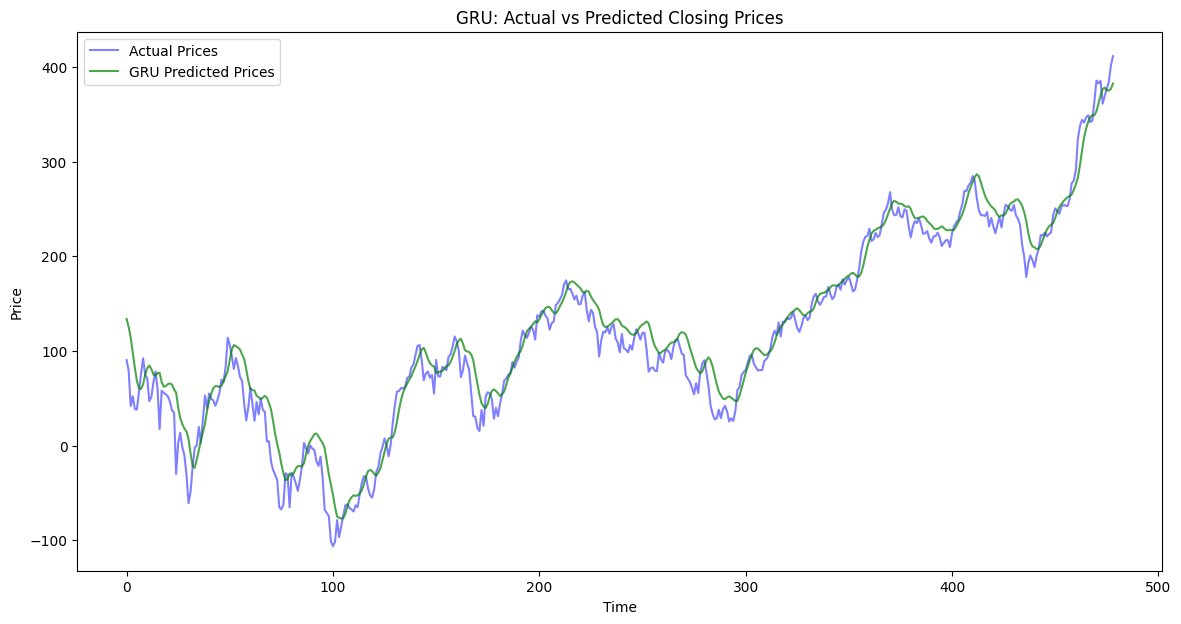

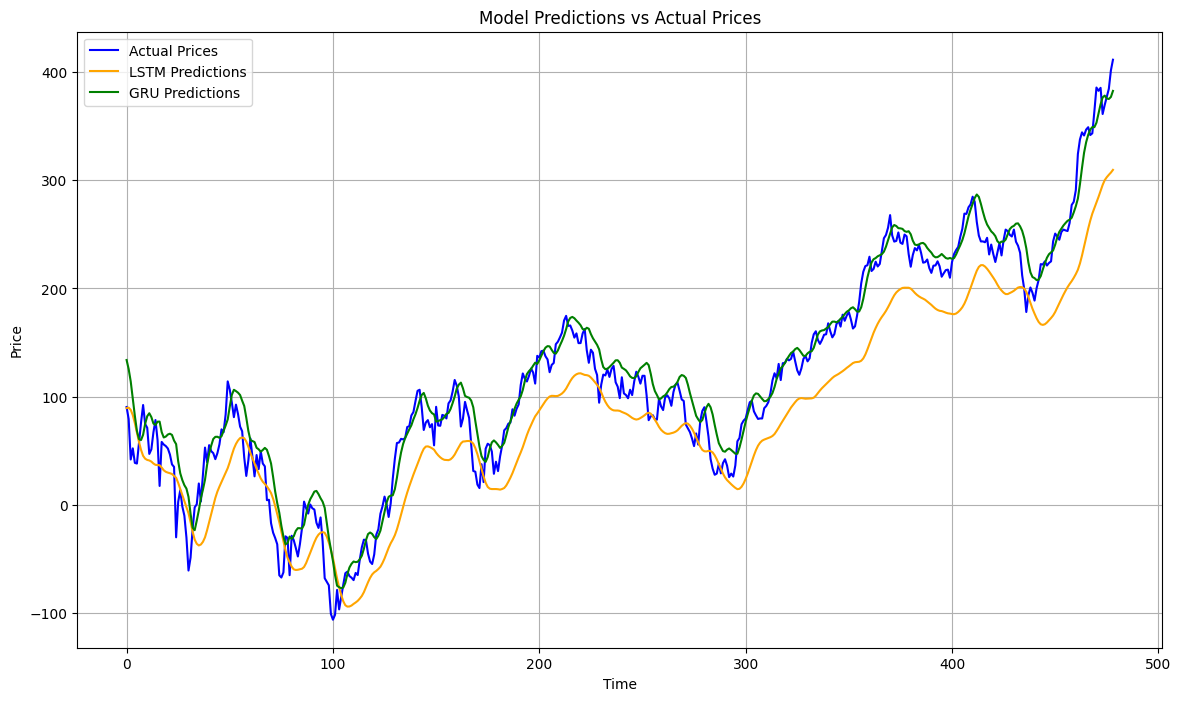

Plots saved as PNG images.


In [ ]:
# prompt: save the iamges of the out of the macd and the moving average with the name

# Assuming you have already generated the plots as shown in your provided code.
# The code to save the plots is already included in your original code:

# ... (Your existing code) ...

# Save the plot of actual vs predicted prices for the best LSTM model
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Prices', color='blue')
plt.plot(best_model_predictions_inv, label='Predicted Prices', color='orange')
plt.title('Actual vs Predicted Closing Prices (Best LSTM Model)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.savefig('best_lstm_model_plot.png') # Save the plot as a PNG image
plt.show()

# Save the plot of actual vs predicted prices for the LSTM model
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Prices', color='blue', alpha=0.5)
plt.plot(lstm_predictions_inv, label='LSTM Predicted Prices', color='orange', alpha=0.7)
plt.title('LSTM: Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.savefig('lstm_model_plot.png') # Save the plot as a PNG image
plt.show()


# Save the plot of actual vs predicted prices for the GRU model
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Prices', color='blue', alpha=0.5)
plt.plot(gru_predictions_inv, label='GRU Predicted Prices', color='green', alpha=0.7)
plt.title('GRU: Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.savefig('gru_model_plot.png') # Save the plot as a PNG image
plt.show()

# Save the final combined plot
plt.figure(figsize=(14, 8))
plt.plot(y_test_inv, label='Actual Prices', color='blue')
plt.plot(lstm_predictions_inv, label='LSTM Predictions', color='orange')
plt.plot(gru_predictions_inv, label='GRU Predictions', color='green')
plt.title('Model Predictions vs Actual Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.savefig('combined_model_plot.png') # Save the plot as a PNG image
plt.show()

print("Plots saved as PNG images.")

In [ ]:
# prompt: predict forecasting prices from this model for 2024 to 2024

import numpy as np

# Assuming 'lstm_model' is your trained LSTM model and other variables are defined as in your code
# You'll need to adjust the input data preparation for the prediction period (2024)
# This example assumes you have a way to get the last 60 days of data to feed into the model

# Example: Create a synthetic future dataset (replace with your actual data)
future_days = 365  # Predict for 1 year (365 days)
future_data = np.zeros((future_days, 6))  # Assuming your input features (6)

# Replace this with your method of obtaining future data.  You might have to use the existing data
# and predict the next day, and then use this prediction as input for the next prediction day.
# Loop for each day in the prediction horizon

# Make predictions
predictions = []
for i in range(future_days):
    # Prepare the input for the model
    last_60_days = future_data[max(0,i-59):i+1]
    scaled_input = scaler.transform(last_60_days)
    X_future = np.array([scaled_input])
    prediction = lstm_model.predict(X_future)

    # Inverse the scaling to get the actual price
    prediction_inv = scaler.inverse_transform(np.concatenate((np.zeros((prediction.shape[0], 5)), prediction), axis=1))[:, -1]
    predictions.append(prediction_inv[0])

    # Update future_data with the prediction (replace placeholder)
    if i+1 < len(future_data):
        future_data[i + 1, 3] = prediction_inv[0] #Update the close price

# Convert predictions to a NumPy array
predictions = np.array(predictions)

# Print or plot the predictions
print(predictions)
import matplotlib.pyplot as plt
plt.plot(predictions)
plt.show()

NameError: name 'scaler' is not defined

In [ ]:
# Assuming you have training data and a dataset split:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your training data
scaler.fit(training_data) # assuming training_data contains the original 6 features

# Use this scaler to transform your data. This code will now work because scaler is now defined
scaled_input = scaler.transform(last_60_days)

# Save the scaler to a file using joblib so you don't have to train it each time
import joblib
joblib.dump(scaler, 'scaler.pkl')


NameError: name 'training_data' is not defined